In [ ]:
# this notebook implements the guaranteed-stability variable-parameter digital filter design method described in:
# Deng, T. B. (2023). Variable-bandwidth recursive-filter design employing cascaded stability-guaranteed
# 2nd-order sections using coefficient transformations. Journal of Information and Telecommunication, 8(2), 149–166.
# https://doi.org/10.1080/24751839.2023.2267890
# see accompanying pdf in the directory of this notebook
#
# this notebook first implements the example from the paper, then an example that generates input for simulation of variable-bandwidth
# filters using the variable_bandwidth_recursive_filter dispatch library
#
# 2025.11.10 Julian Ehlers (jaehlers@gmail.com)

In [2]:
import scipy.signal as signal
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import h5py

In [10]:
# declare the desired variable-bandwidth specification, Cd(omega,psi)
def omega_p(psi):
    return 0.26 * np.pi + psi
def omega_s(psi):
    return 0.5 * np.pi + psi
def Cd(omega, psi):
    return np.array([np.min([1., np.max([0., (omega_s(psi) - omega[j]) / (omega_s(psi) - omega_p(psi))])]) for j in range(len(omega))])

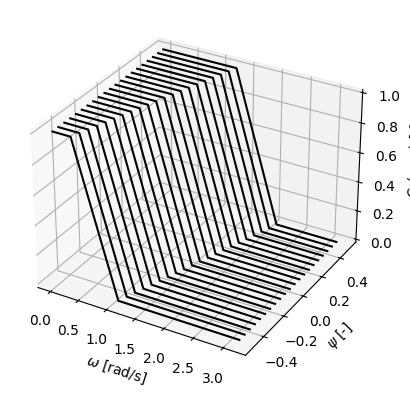

In [45]:
# discretize Cd across psi (and omega for plotting)
psi_range = [-0.16 * np.pi, 0.16 * np.pi]
n_psi = 21
psi_d = np.linspace(psi_range[0], psi_range[1], n_psi)
n_omega = 1000
omega_d = np.linspace(0., np.pi, n_omega)
# plot Cd
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_psi):
    ax.plot(omega_d, np.repeat(psi_d[i],n_omega), zs=Cd(omega_d, psi_d[i]), color='k')
    ax.set_xlabel(r'$\omega$ [rad/s]')
    ax.set_ylabel(r'$\psi$ [-]')
    ax.set_zlabel(r'$C_d(\omega,\psi)$ [-]')
    ax.grid(visible=True)
plt.show()

Optimization terminated successfully.
         Current function value: 3.814545
         Iterations: 697
         Function evaluations: 1031
iteration 0: delta_rms_ratio = inf
[ 0.06542966  0.57041213 -0.25748961  0.77714466 -0.93604453 -0.75683032
  0.32938891  0.71475597 -1.11182803]


C:\Users\jaehl\AppData\Local\Temp\ipykernel_11520\3637675818.py:46: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  x_opt, f_opt, n_iter, n_funcalls, warnflag = opt.fmin(squared_error_function, x0, args, full_output=1, maxiter=None, maxfun=None)


iteration 1: delta_rms_ratio = 1.0516403383163142
[ 0.01878384  0.87326143  0.67534491  1.86585098  1.34634599 -0.58939398
  2.53932473  0.61539498 -0.96301172]
iteration 2: delta_rms_ratio = 0.24758075725424925
[ 0.03195871 -0.33201416  1.05060439  2.05981903  1.25698309 -0.41053869
  2.94497317  0.56722582 -0.91201829]
iteration 3: delta_rms_ratio = 0.5618198408551469
[ 0.04262724 -0.55416963  1.05194855  0.21319633 -0.20415056  0.67311801
  3.90945454  0.59392427 -1.15764286]
iteration 4: delta_rms_ratio = 0.43970818218698443
[ 0.0245314  -0.48641534  1.05194191  0.30947039  0.86540383  0.76598219
  3.86895708  0.59263413 -1.12991616]
Optimization terminated successfully.
         Current function value: 0.078054
         Iterations: 863
         Function evaluations: 1248
iteration 5: delta_rms_ratio = 0.2146417003627051
[ 0.02318364 -0.69841122  0.99794673  1.10309029  0.95172809  0.75355031
  3.8465299   0.57683431 -1.1166713 ]
Optimization terminated successfully.
         Curre

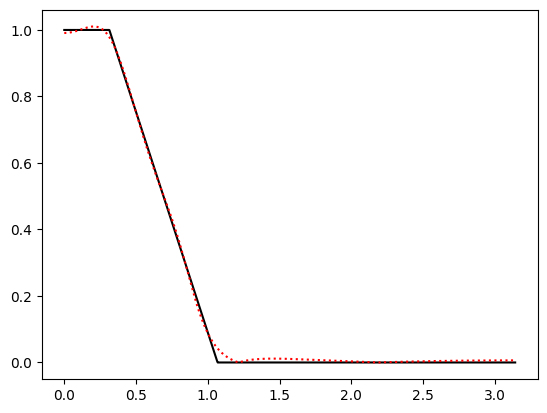

Optimization terminated successfully.
         Current function value: 0.089763
         Iterations: 1111
         Function evaluations: 1591
iteration 0: delta_rms_ratio = inf
[ 0.0262905  -0.60928547  1.00001786  1.18138946  0.99999203  0.73141543
  3.797223    0.55612341 -1.0790012 ]
Optimization terminated successfully.
         Current function value: 0.089763
         Iterations: 158
         Function evaluations: 276
iteration 1: delta_rms_ratio = 0.0
[ 0.0262905  -0.60928547  1.00001786  1.18138946  0.99999203  0.73141543
  3.797223    0.55612341 -1.0790012 ]


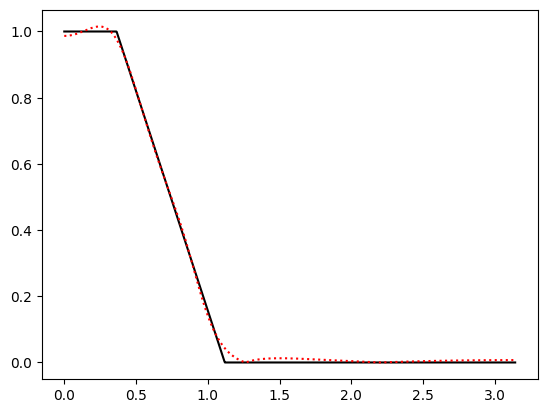

iteration 0: delta_rms_ratio = inf
[ 0.03064443 -0.51832098  1.00014674  1.22253698  0.99998867  0.70653302
  3.74711252  0.53168674 -1.03732265]
Optimization terminated successfully.
         Current function value: 0.108094
         Iterations: 172
         Function evaluations: 299
iteration 1: delta_rms_ratio = 1.8998203046496194e-07
[ 0.03064574 -0.51824661  1.00004052  1.22250088  1.00006151  0.70650793
  3.74709456  0.53168771 -1.03731743]
Optimization terminated successfully.
         Current function value: 0.108094
         Iterations: 161
         Function evaluations: 278
iteration 2: delta_rms_ratio = 2.4003707967103408e-08
[ 0.03064627 -0.51820772  0.99999551  1.22252351  1.00001369  0.70648319
  3.74709345  0.53168405 -1.03731258]


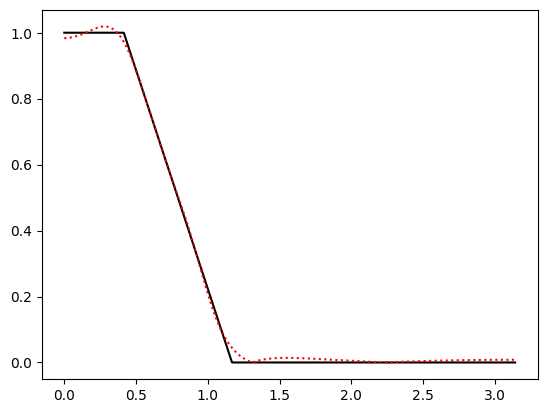

Optimization terminated successfully.
         Current function value: 0.131304
         Iterations: 1186
         Function evaluations: 1692
iteration 0: delta_rms_ratio = inf
[ 0.035276   -0.42208537  0.99998618  1.26940794  0.99997996  0.6793982
  3.69769696  0.50534851 -0.99266254]
Optimization terminated successfully.
         Current function value: 0.131304
         Iterations: 151
         Function evaluations: 266
iteration 1: delta_rms_ratio = 0.0
[ 0.035276   -0.42208537  0.99998618  1.26940794  0.99997996  0.6793982
  3.69769696  0.50534851 -0.99266254]


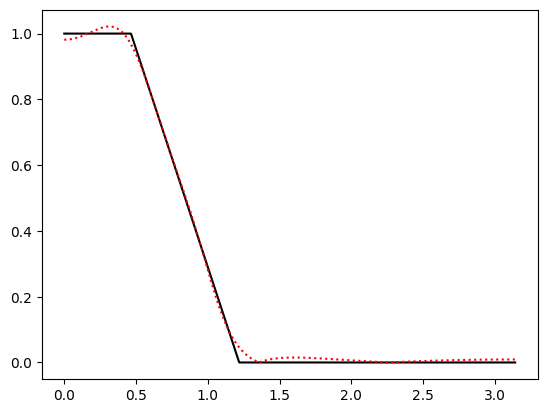

Optimization terminated successfully.
         Current function value: 0.157347
         Iterations: 1075
         Function evaluations: 1545
iteration 0: delta_rms_ratio = inf
[ 0.04017268 -0.31759184  0.99845659  1.31278339  0.987121    0.65066773
  3.65043054  0.4781009  -0.94572196]
Optimization terminated successfully.
         Current function value: 0.157317
         Iterations: 260
         Function evaluations: 415
iteration 1: delta_rms_ratio = 9.345309629203695e-05
[ 0.04025004 -0.32145645  0.99983791  1.31462606  0.99604117  0.65089603
  3.64934033  0.47790723 -0.94514084]
Optimization terminated successfully.
         Current function value: 0.157317
         Iterations: 157
         Function evaluations: 273
iteration 2: delta_rms_ratio = 7.40033333822625e-08
[ 0.04024847 -0.32142527  0.99982334  1.31460323  0.99591483  0.65090932
  3.64936703  0.47790702 -0.94515304]


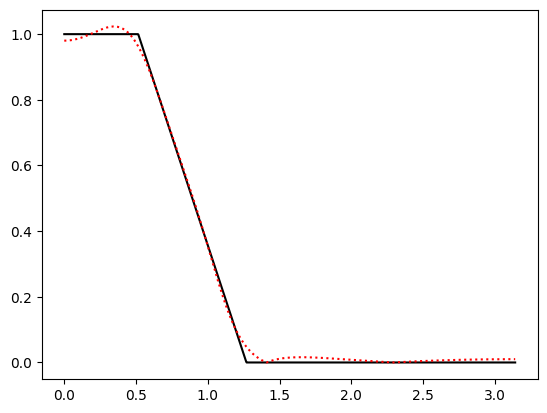

Optimization terminated successfully.
         Current function value: 0.184151
         Iterations: 1026
         Function evaluations: 1482
iteration 0: delta_rms_ratio = inf
[ 0.04513958 -0.21680744  1.00000443  1.37173709  0.99964213  0.62135903
  3.60279896  0.44982634 -0.89484715]
Optimization terminated successfully.
         Current function value: 0.184151
         Iterations: 172
         Function evaluations: 299
iteration 1: delta_rms_ratio = 9.171912531255238e-08
[ 0.04513887 -0.21683345  0.99998504  1.3718017   0.99972775  0.62135963
  3.60280483  0.44981154 -0.89484329]


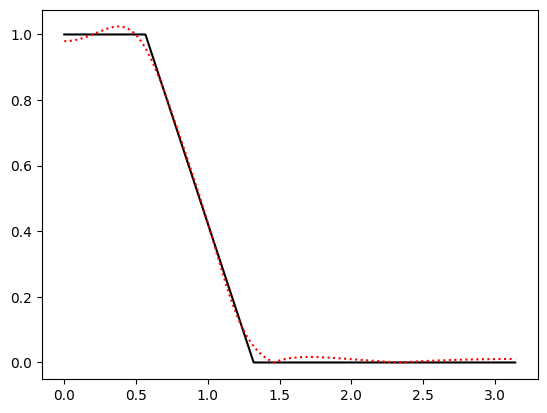

iteration 0: delta_rms_ratio = inf
[ 0.05030899 -0.10939061  1.00010869  1.42452033  0.99961118  0.59152051
  3.5579873   0.42148656 -0.84148528]
Optimization terminated successfully.
         Current function value: 0.210186
         Iterations: 164
         Function evaluations: 293
iteration 1: delta_rms_ratio = 3.5982912580781735e-07
[ 0.0503043  -0.10948101  0.9999706   1.42480901  0.99991473  0.59152084
  3.55802766  0.42147692 -0.84147608]
Optimization terminated successfully.
         Current function value: 0.210186
         Iterations: 141
         Function evaluations: 253
iteration 2: delta_rms_ratio = 3.091231027869317e-07
[ 0.05030664 -0.10960047  0.99990835  1.42459276  0.99968975  0.59171149
  3.55805579  0.42155302 -0.84157997]
Optimization terminated successfully.
         Current function value: 0.210186
         Iterations: 153
         Function evaluations: 268
iteration 3: delta_rms_ratio = 8.61137437289715e-09
[ 0.05030751 -0.10959691  0.99992719  1.42454109  0.9

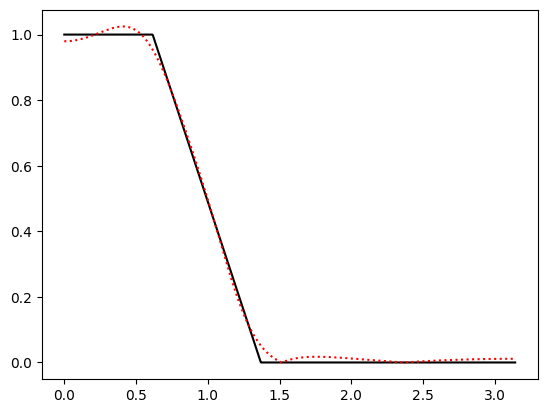

iteration 0: delta_rms_ratio = inf
[ 5.56670942e-02 -1.11029243e-03  1.00044645e+00  1.47559698e+00
  1.00041339e+00  5.62387293e-01  3.51532066e+00  3.93327852e-01
 -7.84988837e-01]
Optimization terminated successfully.
         Current function value: 0.234232
         Iterations: 204
         Function evaluations: 330
iteration 1: delta_rms_ratio = 1.7486961346370023e-06
[ 5.56753848e-02 -1.08964339e-03  1.00003040e+00  1.47576831e+00
  9.99803127e-01  5.62430285e-01  3.51528996e+00  3.93457145e-01
 -7.85112802e-01]
Optimization terminated successfully.
         Current function value: 0.234232
         Iterations: 140
         Function evaluations: 247
iteration 2: delta_rms_ratio = 6.837504301153088e-09
[ 5.56747143e-02 -1.08319588e-03  1.00004902e+00  1.47577988e+00
  9.99728351e-01  5.62430197e-01  3.51530335e+00  3.93447256e-01
 -7.85110532e-01]


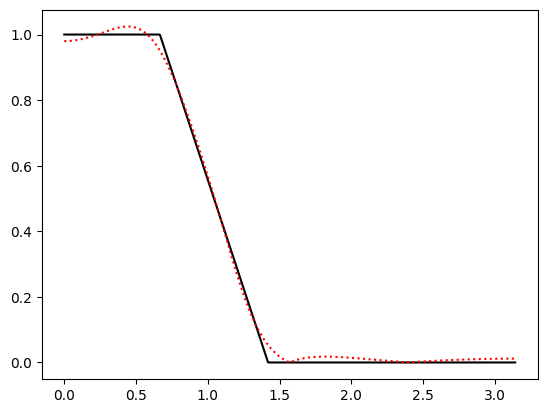

Optimization terminated successfully.
         Current function value: 0.276103
         Iterations: 705
         Function evaluations: 1021
iteration 0: delta_rms_ratio = inf
[ 6.80524132e-02 -1.01047842e-03  1.00008619e+00  1.49537591e+00
  1.00058539e+00  5.78085978e-01  3.44887788e+00  3.80689508e-01
 -7.36125096e-01]
iteration 1: delta_rms_ratio = 0.03947632187515637
[ 0.06117946  0.10870515  1.00003637  1.52570074  1.00023457  0.53377119
  3.47523504  0.36558209 -0.72512722]
Optimization terminated successfully.
         Current function value: 0.255530
         Iterations: 167
         Function evaluations: 276
iteration 2: delta_rms_ratio = 6.438914477131986e-07
[ 0.06118091  0.10861051  1.00015895  1.5258353   1.00047799  0.53372617
  3.47514057  0.36564633 -0.72510959]
Optimization terminated successfully.
         Current function value: 0.255530
         Iterations: 144
         Function evaluations: 246
iteration 3: delta_rms_ratio = 3.678501074785841e-08
[ 0.06118113  0.1

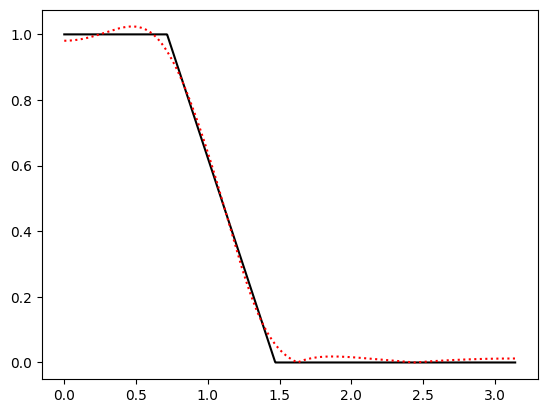

iteration 0: delta_rms_ratio = inf
[ 0.067349    0.21729522  0.9988971   1.56761616  0.98975545  0.50552649
  3.43718363  0.33859777 -0.66096567]
Optimization terminated successfully.
         Current function value: 0.273686
         Iterations: 312
         Function evaluations: 487
iteration 1: delta_rms_ratio = 4.1779252238095016e-05
[ 0.06722968  0.21643069  1.00002418  1.567611    0.99708827  0.50662383
  3.43693669  0.33877938 -0.66134794]
Optimization terminated successfully.
         Current function value: 0.273686
         Iterations: 182
         Function evaluations: 293
iteration 2: delta_rms_ratio = 4.6475736469685084e-07
[ 0.06721763  0.21662688  0.99985757  1.5677723   0.99686168  0.50658016
  3.43703014  0.33875151 -0.66136   ]
Optimization terminated successfully.
         Current function value: 0.273684
         Iterations: 571
         Function evaluations: 835
iteration 3: delta_rms_ratio = 2.9758783513386604e-06
[ 0.06705493  0.21695573  0.999983    1.57114987  

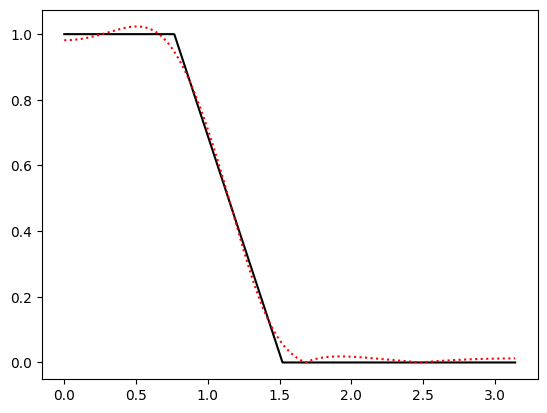

Optimization terminated successfully.
         Current function value: 0.288584
         Iterations: 1213
         Function evaluations: 1740
iteration 0: delta_rms_ratio = inf
[ 0.07318956  0.32420078  0.99998405  1.61380399  0.9999922   0.48097204
  3.40229104  0.31259524 -0.59338201]
Optimization terminated successfully.
         Current function value: 0.288584
         Iterations: 152
         Function evaluations: 260
iteration 1: delta_rms_ratio = 0.0
[ 0.07318956  0.32420078  0.99998405  1.61380399  0.9999922   0.48097204
  3.40229104  0.31259524 -0.59338201]


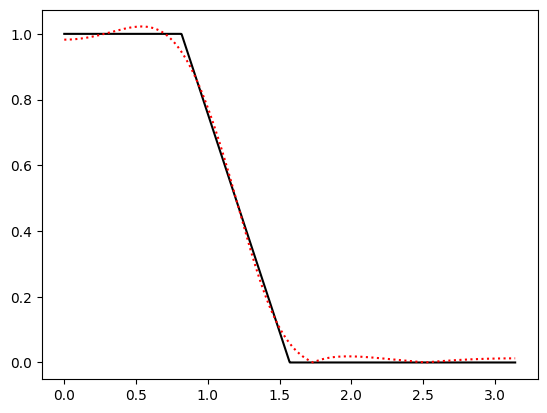

Optimization terminated successfully.
         Current function value: 0.300317
         Iterations: 948
         Function evaluations: 1377
iteration 0: delta_rms_ratio = inf
[ 0.07966218  0.42946906  0.99999303  1.65309687  0.99991327  0.45751861
  3.37064519  0.28754491 -0.52058553]
Optimization terminated successfully.
         Current function value: 0.300317
         Iterations: 155
         Function evaluations: 267
iteration 1: delta_rms_ratio = 2.1760841925826123e-10
[ 0.07966152  0.42945203  0.99997523  1.65316234  0.99999963  0.45751438
  3.37064363  0.28753802 -0.52057394]


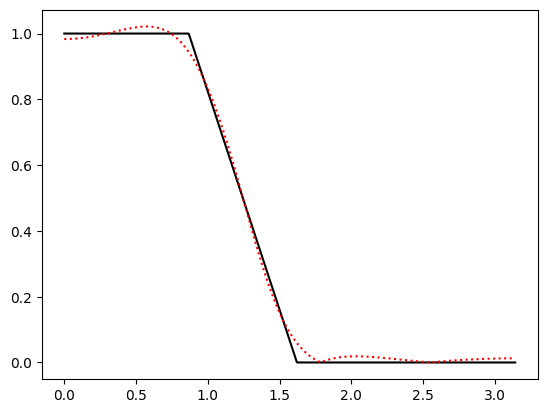

Optimization terminated successfully.
         Current function value: 0.309100
         Iterations: 1065
         Function evaluations: 1519
iteration 0: delta_rms_ratio = inf
[ 0.0865117   0.53230702  1.00002606  1.68905733  0.99998449  0.43690116
  3.34289747  0.26343881 -0.44218799]
Optimization terminated successfully.
         Current function value: 0.309100
         Iterations: 152
         Function evaluations: 259
iteration 1: delta_rms_ratio = 0.0
[ 0.0865117   0.53230702  1.00002606  1.68905733  0.99998449  0.43690116
  3.34289747  0.26343881 -0.44218799]


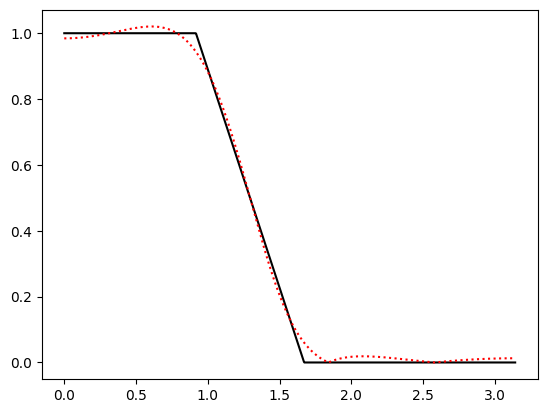

Optimization terminated successfully.
         Current function value: 0.315258
         Iterations: 685
         Function evaluations: 999
iteration 0: delta_rms_ratio = inf
[ 0.09446598  0.63035132  0.99933146  1.70934541  0.98976699  0.42204039
  3.31623017  0.24173196 -0.36171155]
Optimization terminated successfully.
         Current function value: 0.315222
         Iterations: 605
         Function evaluations: 882
iteration 1: delta_rms_ratio = 5.7812115511489806e-05
[ 0.09378213  0.63195076  0.9999427   1.72242119  1.00078619  0.42055013
  3.31904806  0.2401757  -0.35793898]
Optimization terminated successfully.
         Current function value: 0.315221
         Iterations: 167
         Function evaluations: 284
iteration 2: delta_rms_ratio = 2.1186044602727398e-07
[ 0.09376756  0.63208159  0.99998351  1.72249963  1.00067258  0.42057666
  3.31918091  0.24009761 -0.35786504]
Optimization terminated successfully.
         Current function value: 0.315221
         Iterations: 149

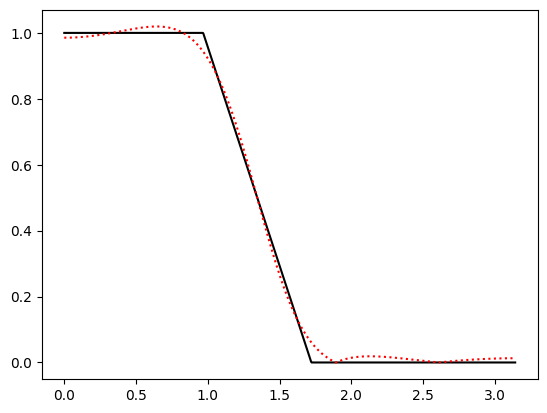

Optimization terminated successfully.
         Current function value: 0.319000
         Iterations: 912
         Function evaluations: 1315
iteration 0: delta_rms_ratio = inf
[ 0.10152568  0.72927777  1.00002815  1.75158606  1.00001206  0.41083172
  3.29954698  0.2161856  -0.26732974]
Optimization terminated successfully.
         Current function value: 0.319000
         Iterations: 147
         Function evaluations: 256
iteration 1: delta_rms_ratio = 2.044425095610877e-09
[ 0.1015263   0.72930315  1.00004704  1.75154626  1.00003834  0.41082359
  3.29955275  0.21618226 -0.26730692]


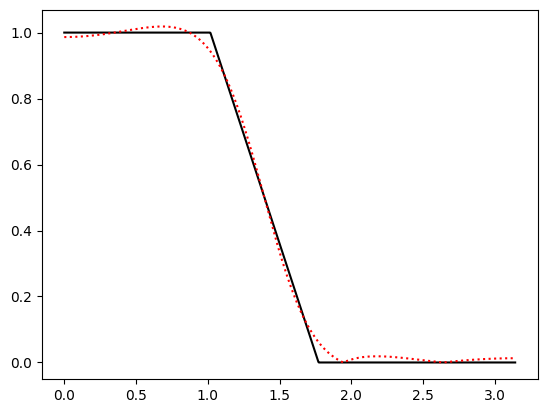

Optimization terminated successfully.
         Current function value: 0.320760
         Iterations: 994
         Function evaluations: 1439
iteration 0: delta_rms_ratio = inf
[ 0.10977955  0.8230068   1.00002636  1.77847898  1.00005337  0.40909587
  3.27865509  0.19247309 -0.17590644]
Optimization terminated successfully.
         Current function value: 0.320760
         Iterations: 153
         Function evaluations: 263
iteration 1: delta_rms_ratio = 0.0
[ 0.10977955  0.8230068   1.00002636  1.77847898  1.00005337  0.40909587
  3.27865509  0.19247309 -0.17590644]


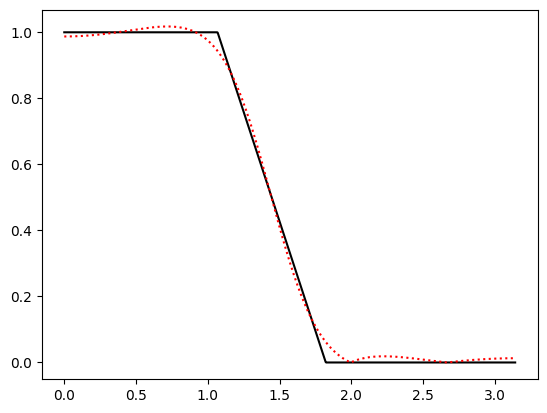

Optimization terminated successfully.
         Current function value: 0.320811
         Iterations: 1215
         Function evaluations: 1732
iteration 0: delta_rms_ratio = inf
[ 0.1185793   0.91339166  1.00001129  1.80291821  1.00009795  0.41221497
  3.25215591  0.17107337 -0.08836231]
Optimization terminated successfully.
         Current function value: 0.320811
         Iterations: 144
         Function evaluations: 251
iteration 1: delta_rms_ratio = 0.0
[ 0.1185793   0.91339166  1.00001129  1.80291821  1.00009795  0.41221497
  3.25215591  0.17107337 -0.08836231]


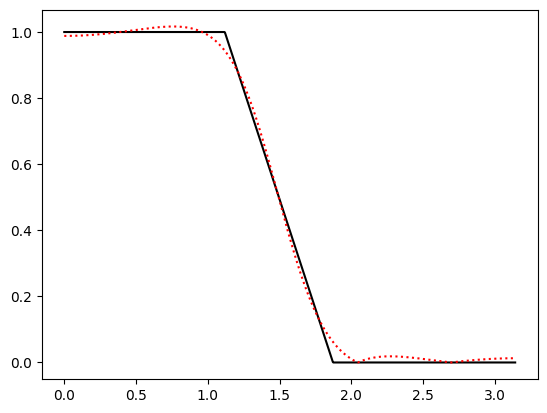

iteration 0: delta_rms_ratio = inf
[ 0.12792368  1.00043657  0.99991661  1.82605874  1.00099541  0.41625168
  3.22015971  0.15371651 -0.00465804]
Optimization terminated successfully.
         Current function value: 0.319444
         Iterations: 115
         Function evaluations: 209
iteration 1: delta_rms_ratio = 4.62008040290967e-07
[ 0.12793213  1.00039026  0.99994122  1.82593146  1.00089484  0.41633948
  3.22009284  0.15363286 -0.00472261]
Optimization terminated successfully.
         Current function value: 0.319444
         Iterations: 129
         Function evaluations: 234
iteration 2: delta_rms_ratio = 1.9309212759569697e-07
[ 0.1279353   1.00038359  0.99999522  1.82586129  1.00079695  0.4163511
  3.22008356  0.15364076 -0.00475814]
Optimization terminated successfully.
         Current function value: 0.319444
         Iterations: 127
         Function evaluations: 228
iteration 3: delta_rms_ratio = 8.327304668227884e-09
[ 0.12793445  1.00040402  0.99997709  1.82585576  1.00

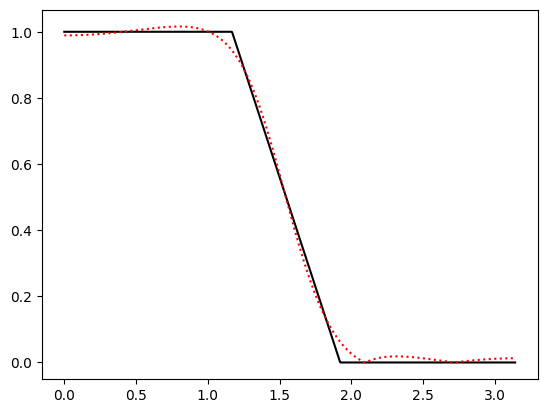

Optimization terminated successfully.
         Current function value: 0.319660
         Iterations: 602
         Function evaluations: 888
iteration 0: delta_rms_ratio = inf
[ 0.134303    1.08164625  0.99995969  1.84260882  0.99969811  0.42040299
  3.15338164  0.16274963 -0.00485308]
Optimization terminated successfully.
         Current function value: 0.316925
         Iterations: 822
         Function evaluations: 1195
iteration 1: delta_rms_ratio = 0.00430695350667408
[0.13799721 1.0840582  0.99999918 1.84521817 1.00000067 0.41997757
 3.18373754 0.14068782 0.0755621 ]
Optimization terminated successfully.
         Current function value: 0.316925
         Iterations: 141
         Function evaluations: 242
iteration 2: delta_rms_ratio = 0.0
[0.13799721 1.0840582  0.99999918 1.84521817 1.00000067 0.41997757
 3.18373754 0.14068782 0.0755621 ]


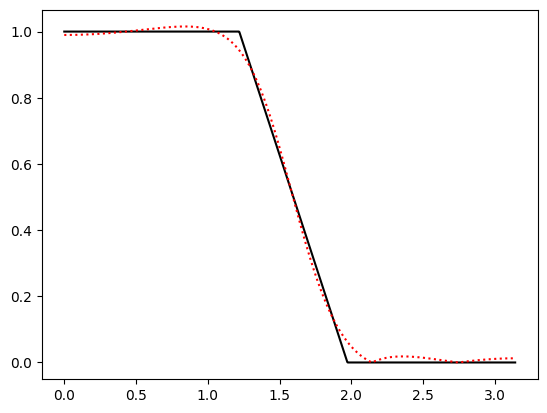

Optimization terminated successfully.
         Current function value: 0.313495
         Iterations: 1206
         Function evaluations: 1759
iteration 0: delta_rms_ratio = inf
[0.14870064 1.16427955 1.00002421 1.8635027  0.99994916 0.42270552
 3.1446943  0.13185319 0.15463845]
Optimization terminated successfully.
         Current function value: 0.313495
         Iterations: 136
         Function evaluations: 233
iteration 1: delta_rms_ratio = 0.0
[0.14870064 1.16427955 1.00002421 1.8635027  0.99994916 0.42270552
 3.1446943  0.13185319 0.15463845]


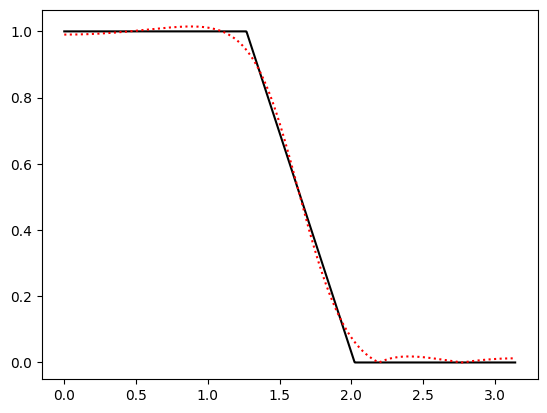

iteration 0: delta_rms_ratio = inf
[0.15813484 1.24210746 0.99227009 1.87208369 0.98980175 0.42720688
 3.10027727 0.12809658 0.20191236]
Optimization terminated successfully.
         Current function value: 0.309375
         Iterations: 648
         Function evaluations: 960
iteration 1: delta_rms_ratio = 0.0016961315593034324
[0.16014899 1.24119418 1.00012701 1.87966916 0.99938719 0.42466483
 3.10380275 0.12685375 0.23314826]
Optimization terminated successfully.
         Current function value: 0.309375
         Iterations: 141
         Function evaluations: 252
iteration 2: delta_rms_ratio = 2.190438892810649e-07
[0.16014665 1.24107001 1.00011262 1.88007225 0.99984251 0.42456464
 3.10380416 0.12696268 0.23333834]
Optimization terminated successfully.
         Current function value: 0.309375
         Iterations: 159
         Function evaluations: 273
iteration 3: delta_rms_ratio = 8.797843146413687e-09
[0.16014697 1.24105364 1.00008259 1.88008861 0.99988117 0.42455941
 3.10381172 0

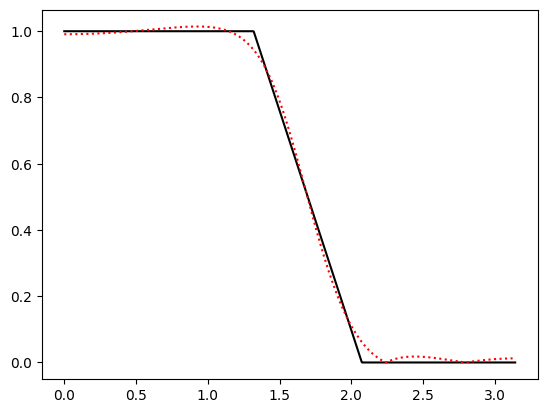

Optimization terminated successfully.
         Current function value: 0.078076
         Iterations: 771
         Function evaluations: 1123
iteration 0: delta_rms_ratio = inf
[ 0.02189154 -0.69853484  1.00139156  1.20123991  1.00626171  0.75306806
  3.84744278  0.57772867 -1.11761884]
Optimization terminated successfully.
         Current function value: 0.077966
         Iterations: 848
         Function evaluations: 1224
iteration 1: delta_rms_ratio = 0.0007052541909296924
[ 0.02234691 -0.69609433  0.9999964   1.14515342  1.00000293  0.75344091
  3.84737542  0.57740376 -1.11726535]
Optimization terminated successfully.
         Current function value: 0.077966
         Iterations: 184
         Function evaluations: 313
iteration 2: delta_rms_ratio = 0.0
[ 0.02234691 -0.69609433  0.9999964   1.14515342  1.00000293  0.75344091
  3.84737542  0.57740376 -1.11726535]


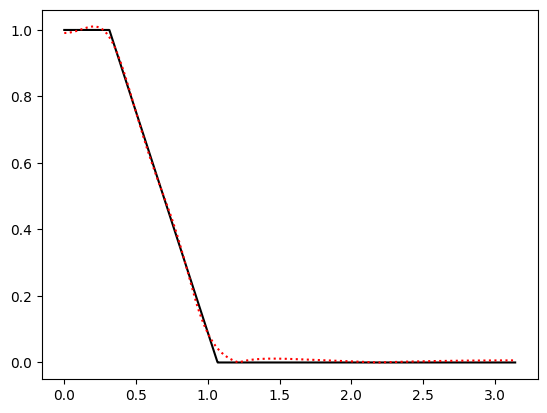

In [68]:
# design fixed-coefficient filters at each psi_d
filter_order = 4
n_section = int(np.ceil(filter_order / 2))
nx = 4 * n_section + 1
epsilon = 1.e-5
lam = 1. - epsilon
eta = 1.e-7
def x_to_sos(x, lam):
    nx = len(x)
    n_section = int((nx - 1) / 4)
    sos = np.ones((n_section, 6))
    i_b_start = 1
    i_x_start = 1 + n_section * 2
    for i_section in range(n_section):
        sos[i_section, 1] = x[i_b_start + i_section * 2]
        sos[i_section, 2] = x[i_b_start + i_section * 2 + 1]
        ai2 = lam * np.sin(x[i_x_start + i_section * 2])
        ai1 = lam * np.sin(x[i_x_start + i_section * 2 + 1]) * (1. + ai2)
        sos[i_section, 4] = ai1
        sos[i_section, 5] = ai2
    return sos
def squared_error_function(x, Cd, omega, psi, lam):
    sos = x_to_sos(x, lam)
    w, h = signal.freqz_sos(sos, omega, fs=2.*np.pi)
    return np.sum(np.power(Cd(omega, psi) - x[0] * np.abs(h), 2.))
def relative_rms(x, Cd, omega, psi, lam):
    sos = x_to_sos(x, lam)
    w, h = signal.freqz_sos(sos, omega, fs=2.*np.pi)
    return np.sqrt(np.sum(np.power(Cd(omega, psi) - x[0] * np.abs(h), 2.)) / np.sum(np.power(Cd(omega, psi), 2)))
def relative_rms_omega_psi(x, Cd, omega, psi, lam):
    n_psi = len(psi)
    numerator = 0.
    denominator = 0.
    for k_psi in range(n_psi):
        sos = x_to_sos(x[k_psi,:], lam)
        w, h = signal.freqz_sos(sos, omega, fs=2.*np.pi)
        numerator += np.sum(np.power(Cd(omega, psi[k_psi]) - x[k_psi,0] * np.abs(h), 2.))
        denominator += np.sum(np.power(Cd(omega, psi[k_psi]), 2))
    return np.sqrt(numerator / denominator)
x_opts = np.zeros((n_psi,nx))
k_psis = [k for k in range(n_psi)]
k_psis.append(0) # repeat the first optimization with a more accurate initial condition once the other optimizations are done
for k_psi in k_psis:
    if k_psi == 0:
        k_x_opt = 1
    else:
        k_x_opt = k_psi - 1
    x0 = x_opts[k_x_opt, :]
    args = (Cd, omega_d, psi_d[k_psi], lam)
    delta_rms_ratio = np.inf
    delta_rms = np.inf
    n_iteration = 0
    while delta_rms_ratio > eta:
        if n_iteration > 0:
            x0 = x_opt
        x_opt, f_opt, n_iter, n_funcalls, warnflag = opt.fmin(squared_error_function, x0, args, full_output=1, maxiter=None, maxfun=None)
        # force x_ij variables into the range [-pi/2,pi/2]
        for k_x in range(4):
            x_opt[1 + filter_order + kx] = np.asin(np.sin(x_opt[1 + filter_order + kx]))
        delta_rms_prev = delta_rms
        delta_rms = relative_rms(x_opt, Cd, omega_d, psi_d[k_psi], lam)
        delta_rms_ratio = np.abs(delta_rms - delta_rms_prev) / delta_rms
        print('iteration ' + str(n_iteration) + ': delta_rms_ratio = ' + str(delta_rms_ratio))
        print(x_opt)
        n_iteration += 1
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(omega_d, Cd(omega_d, psi_d[k_psi]), 'k')
    sos = x_to_sos(x_opt, lam)
    w, h = signal.freqz_sos(sos, omega_d, fs=2.*np.pi)
    ax.plot(omega_d, x_opt[0] * np.abs(h), 'r:')
    plt.show()
    x_opts[k_psi,:] = x_opt

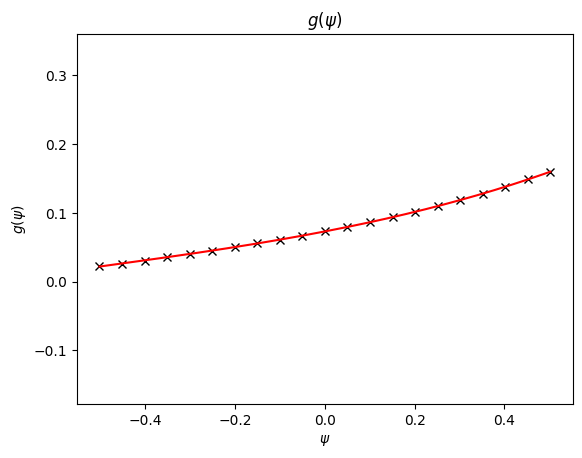

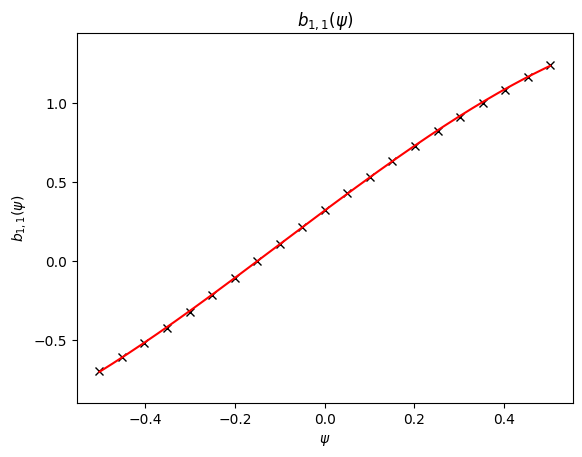

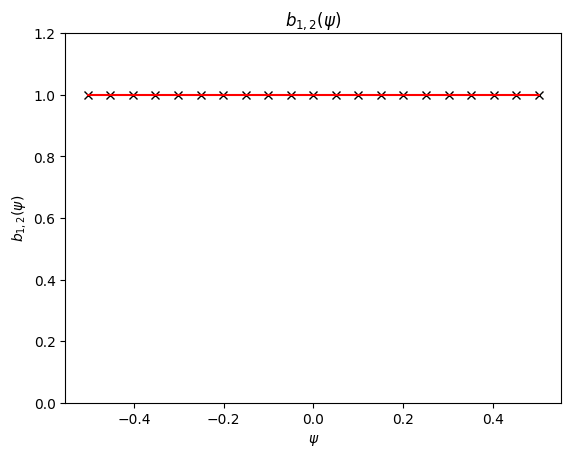

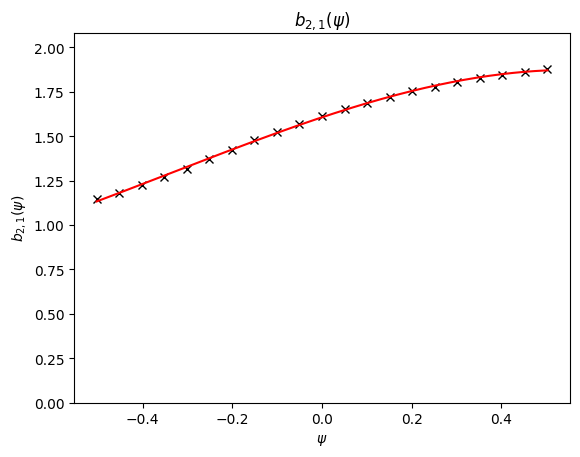

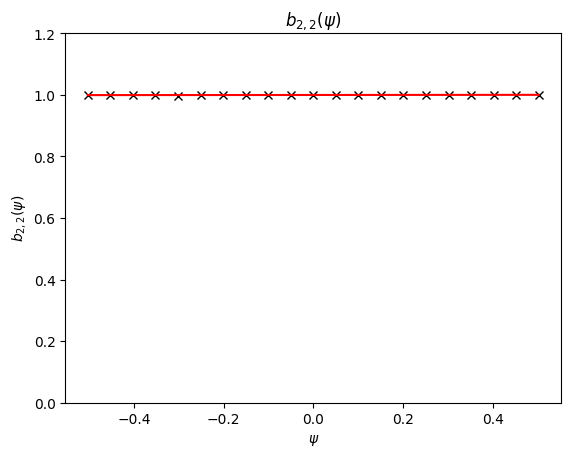

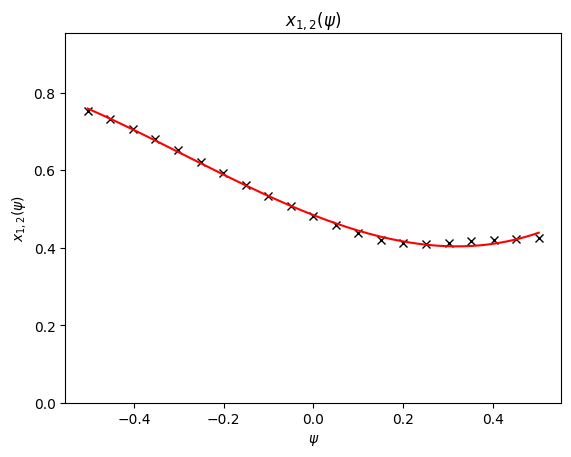

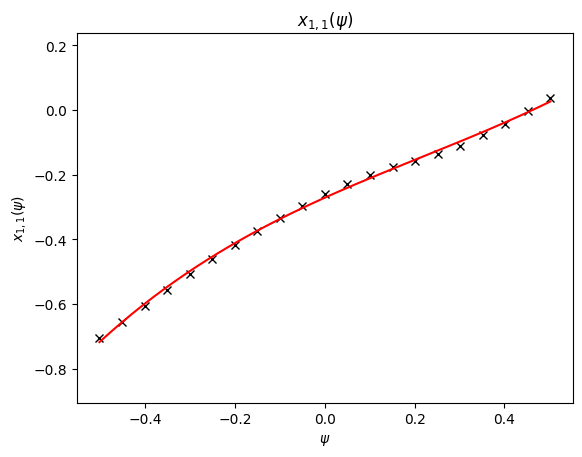

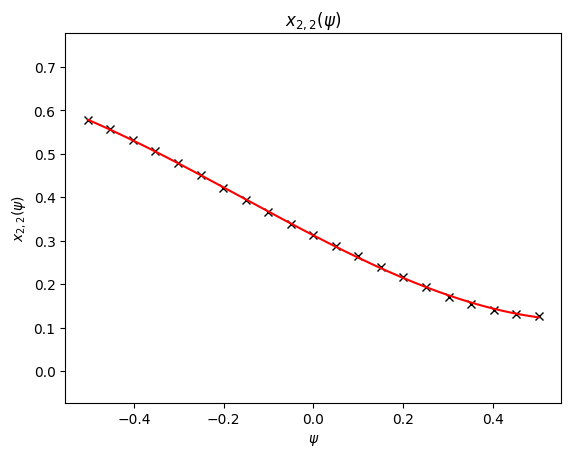

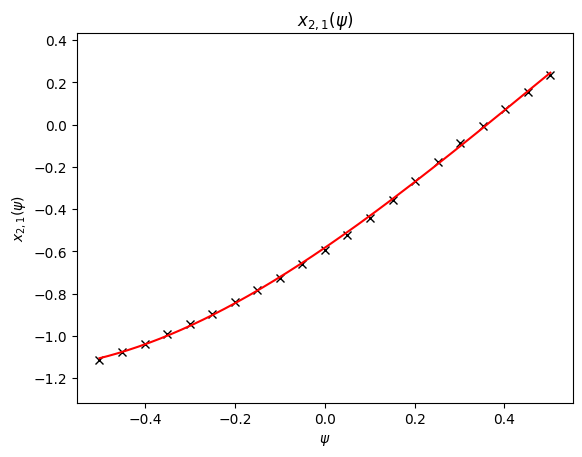

[3, 3, 1, 3, 1, 3, 3, 3, 3]


In [98]:
# fit polynomials in psi to the filter coefficients
def polynomial_order_zero(x, a0):
    return np.repeat(a0, len(x))
def polynomial_order_one(x, a0, a1):
    return a0 + a1 * x
def polynomial_order_two(x, a0, a1, a2):
    return a0 + a1 * x + a2 * np.power(x, 2)
def polynomial_order_three(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * np.power(x, 2) + a3 * np.power(x, 3)
# jacobians
def polynomial_order_zero_jac(x, a0):
    return np.ones((len(x), 1))
def polynomial_order_one_jac(x, a0, a1):
    j = np.ones((len(x), 2))
    j[:,1] = x
    return j
def polynomial_order_two_jac(x, a0, a1, a2):
    j = np.ones((len(x), 3))
    j[:,1] = x
    j[:,2] = np.power(x, 2)
    return j
def polynomial_order_three_jac(x, a0, a1, a2, a3):
    j = np.ones((len(x), 4))
    j[:,1] = x
    j[:,2] = np.power(x, 2)
    j[:,3] = np.power(x, 3)
    return j
polynomial_order = [3 for kx in range(nx)]
polynomials = [polynomial_order_zero, polynomial_order_one, polynomial_order_two, polynomial_order_three]
jacs = [polynomial_order_zero_jac, polynomial_order_one_jac, polynomial_order_two_jac, polynomial_order_three_jac]
a_opts = []
parameter_names = [r'$g(\psi)$']
for k_section in range(n_section):
    for k_coeff in range(2):
        parameter_names.append(r'$b_{' + str(k_section + 1) + ', ' + str(k_coeff + 1) + r'}(\psi)$')
for k_section in range(n_section):
    for k_coeff in [2,1]:
        parameter_names.append(r'$x_{' + str(k_section + 1) + ', ' + str(k_coeff) + r'}(\psi)$')
for kx in range(nx):
    delta_rms = 0.
    poly_order = 4
    rms = -1.
    while (delta_rms < 0.001) & (poly_order > 0):
        poly_order = poly_order - 1
        if rms > 0:
            last_a_opt = copy.deepcopy(a_opt[0])
        a_opt = opt.curve_fit(polynomials[poly_order], psi_d, x_opts[:,kx], jac=jacs[poly_order])
        x_fit = polynomials[poly_order](psi_d, *(a_opt[0]))
        x_test = copy.deepcopy(x_opts)
        x_test[:,kx] = x_fit
        this_rms = relative_rms_omega_psi(x_test, Cd, omega_d, psi_d, lam)
        if rms < 0:
            rms = this_rms
            last_a_opt = copy.deepcopy(a_opt[0])
        delta_rms = np.abs(this_rms - rms) / rms        
    polynomial_order[kx] = poly_order + 1
    a_opts.append(last_a_opt)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(psi_d, x_opts[:,kx], 'kx')
    psi_fit = np.linspace(psi_range[0], psi_range[1], n_psi * 10)
    ax.plot(psi_fit, polynomials[polynomial_order[kx]](psi_fit, *a_opts[kx]), 'r-')
    ax.set_ylim(np.min([np.min([np.min(x_opts[:,kx]) - 0.2, np.min(x_opts[:,kx]) * 1.1]), 0.]), np.max([np.max([np.max(x_opts[:,kx]) + 0.2, np.max(x_opts[:,kx]) * 1.1]), 0.]))
    ax.set_title(parameter_names[kx])
    ax.set_xlabel(r'$\psi$')
    ax.set_ylabel(parameter_names[kx])
    plt.show()
# The polynomial orders found here do not all agree with the paper, but the fits look good, so I won't pursue it further.
# I might have misinterpreted the order-reduction criterion in the paper, or it could be that my fmin settings were not quite the same as the 
# authors used on MATLAB's fminsearch, and so my x_opts might be a bit different from theirs. Order differences will have very little effect on
# filter execution time when implemented.
print(polynomial_order)

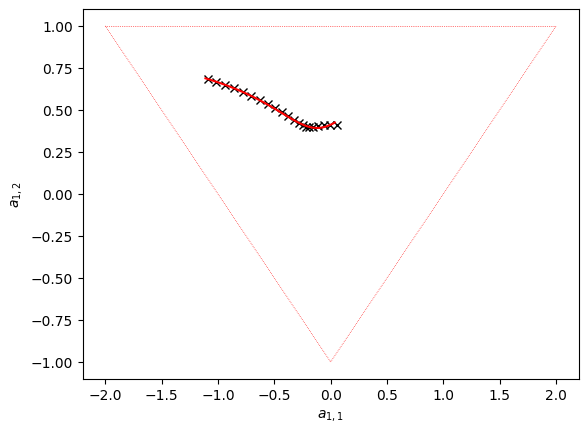

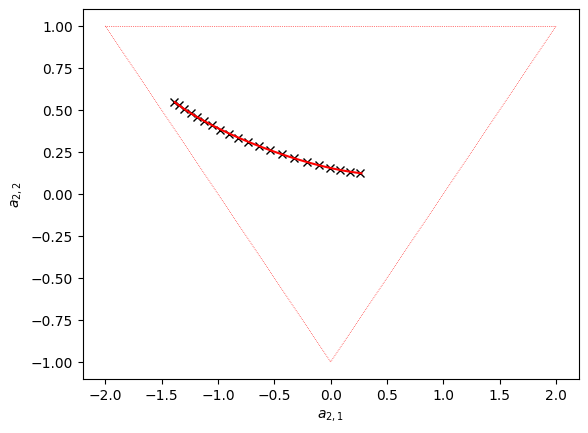

In [103]:
# check stability triangle for fixed-coefficient and fitted variable-coefficient filters
n_psi_fit = 41
psi_fit = np.linspace(psi_range[0], psi_range[1], n_psi_fit)
for k_section in range(n_section):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot([-2.,2.],[1.,1.], 'r:', linewidth=0.5)
    ax.plot([-2.,0.],[1.,-1.], 'r:', linewidth=0.5)
    ax.plot([0.,2.],[-1.,1.], 'r:', linewidth=0.5)
    for k_psi in range(n_psi):
        xi2 = x_opts[k_psi, 1+filter_order+k_section * 2]
        xi1 = x_opts[k_psi, 1+filter_order+k_section * 2 + 1]
        ai2 = lam * np.sin(xi2)
        ai1 = lam * np.sin(xi1) * (1. + ai2)
        ax.plot(ai1, ai2, 'kx')
    ai2_fit = np.zeros(n_psi_fit)
    ai1_fit = np.zeros(n_psi_fit)
    for k_psi in range(n_psi_fit):
        xi2 = polynomials[polynomial_order[1+filter_order+k_section * 2]](psi_fit[k_psi], *a_opts[1+filter_order+k_section * 2])
        xi1 = polynomials[polynomial_order[1+filter_order+k_section * 2 + 1]](psi_fit[k_psi], *a_opts[1+filter_order+k_section * 2 + 1])
        ai2_fit[k_psi] = lam * np.sin(xi2)
        ai1_fit[k_psi] = lam * np.sin(xi1) * (1. + ai2_fit[k_psi])
    ax.plot(ai1_fit, ai2_fit, 'r')
    ax.set_xlabel(r'$a_{' + str(k_section + 1) + ', 1}$')
    ax.set_ylabel(r'$a_{' + str(k_section + 1) + ', 2}$')
    plt.show()

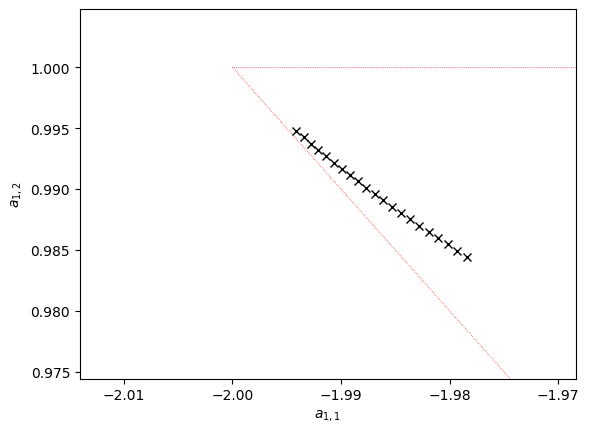

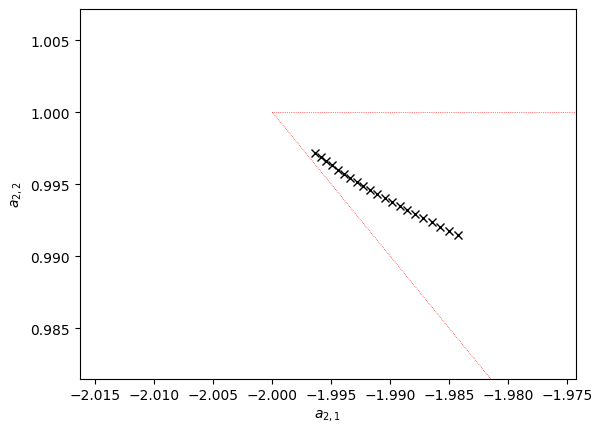

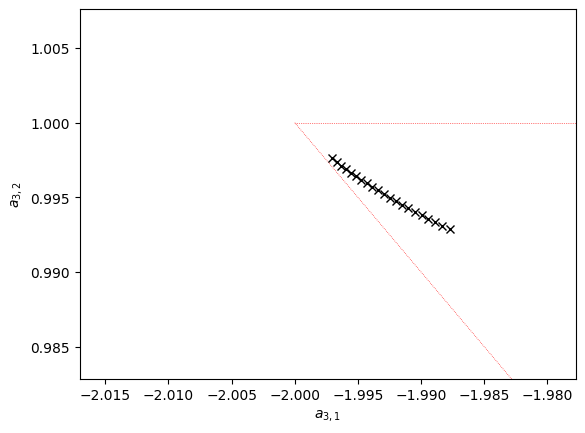

In [5]:
# turn the design process around a little bit:
# - use prescribed filter design functions to get constant filter coefficients
# - convert filter coefficients to x_opt
# - check stability triangle
# - fit polynomials and check stability triangle again

# example: butterworth bandpass filter where lower corner frequency varies with psi
# psi
fs = 16 #Hz
psi_range = [4., 12.]
fc_range = [1./15., 0.2]
fc_width = 0.1
n_psi = 21
psi_d = np.linspace(psi_range[0], psi_range[1], n_psi)
n_omega = 1000
omega_d = np.linspace(0., fs / 2., n_omega)
def fc_lower(psi, psi_range, fc_range):
    return np.interp(psi, psi_range, fc_range)
def f_mid(psi, psi_range, fc_range):
    return np.interp(psi, psi_range, fc_range)
def Cd(omega, psi, filter_order, psi_range, fc_range, fc_width, fs):
    sos = signal.butter(filter_order, [f_mid(psi, psi_range, fc_range)*(1.-fc_width), f_mid(psi, psi_range, fc_range)*(1.+fc_width)], btype='bandpass', output='sos', fs=fs)
    w, h = signal.freqz_sos(sos, omega, fs=fs)
    return np.abs(h)
def sos_to_x(sos, lam):
    n_section = len(sos)
    nx = 1 + 4 * n_section
    x = np.zeros(nx)
    x[0] = sos[0][0]
    sos[0][0:3] = sos[0][0:3] / x[0]
    for k_section in range(n_section):
        x[1 + k_section * 2] = sos[k_section][1]
        x[1 + k_section * 2 + 1] = sos[k_section][2]
        ai2 = sos[k_section][5]
        ai1 = sos[k_section][4]
        xi2 = np.asin(ai2 / lam)
        xi1 = np.asin(ai1 / lam / (1. + ai2))
        x[1 + n_section * 2 + k_section * 2] = xi2
        x[1 + n_section * 2 + k_section * 2 + 1] = xi1
    return(x)
def x_to_sos(x, lam):
    nx = len(x)
    n_section = int((nx - 1) / 4)
    sos = np.ones((n_section, 6))
    i_b_start = 1
    i_x_start = 1 + n_section * 2
    for i_section in range(n_section):
        sos[i_section, 1] = x[i_b_start + i_section * 2]
        sos[i_section, 2] = x[i_b_start + i_section * 2 + 1]
        ai2 = lam * np.sin(x[i_x_start + i_section * 2])
        ai1 = lam * np.sin(x[i_x_start + i_section * 2 + 1]) * (1. + ai2)
        sos[i_section, 4] = ai1
        sos[i_section, 5] = ai2
    return sos
filter_order = 3
n_section = filter_order # a butterworth filter produces filter_order sos sections
nx = 1 + n_section * 4
epsilon = 1.e-5
lam = 1. - epsilon
x_opts = np.zeros((n_psi, nx))
ai2s = np.zeros(n_psi)
ai1s = np.zeros(n_psi)
for k_psi in range(n_psi):
    sos = signal.butter(filter_order, [f_mid(psi_d[k_psi], psi_range, fc_range)*(1.-fc_width), f_mid(psi_d[k_psi], psi_range, fc_range)*(1.+fc_width)], btype='bandpass', output='sos', fs=16)
    x_opts[k_psi,:] = sos_to_x(sos, lam)
# depending on the filter choice and psi range, sometimes the order of the sos sections changes as psi varies. Discontinuous jumps in
# the stability and parameter plots indicate these order changes. In such a case, some more code is needed to re-order the sos
# sections before proceeding with the polynomial fits
for k_section in range(n_section):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot([-2.,2.],[1.,1.], 'r:', linewidth=0.5)
    ax.plot([-2.,0.],[1.,-1.], 'r:', linewidth=0.5)
    ax.plot([0.,2.],[-1.,1.], 'r:', linewidth=0.5)
    for k_psi in range(n_psi):
        xi2 = x_opts[k_psi, 1+n_section*2+k_section * 2]
        xi1 = x_opts[k_psi, 1+n_section*2+k_section * 2 + 1]
        ai2s[k_psi] = lam * np.sin(xi2)
        ai1s[k_psi] = lam * np.sin(xi1) * (1. + ai2s[k_psi])
    ax.plot(ai1s, ai2s, 'kx')
    ax.set_xlabel(r'$a_{' + str(k_section + 1) + ', 1}$')
    ax.set_ylabel(r'$a_{' + str(k_section + 1) + ', 2}$')
    ax.set_xlim(np.min([np.min(ai1s)*1.01, np.min(ai1s)-0.01]), np.max([np.max(ai1s)*1.01, np.max(ai1s)+0.01]))
    ax.set_ylim(np.min([np.min(ai2s)*1.01, np.min(ai2s)-0.01]), np.max([np.max(ai2s)*1.01, np.max(ai2s)+0.01]))
    plt.show()
# for kx in range(nx):
#     fig, ax = plt.subplots(nrows=1, ncols=1)
#     ax.plot(psi_d, x_opts[:,kx],'kx')
#     plt.show()

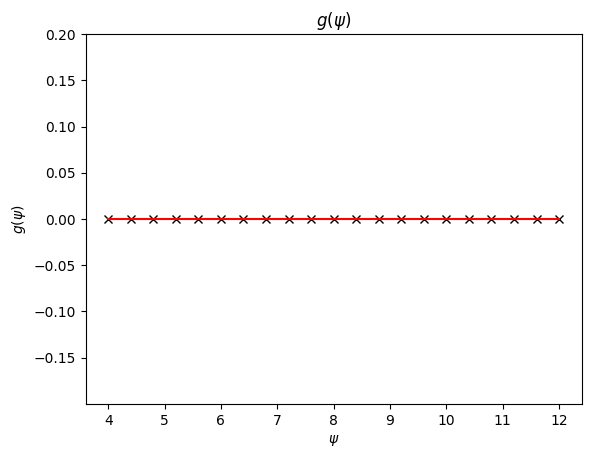

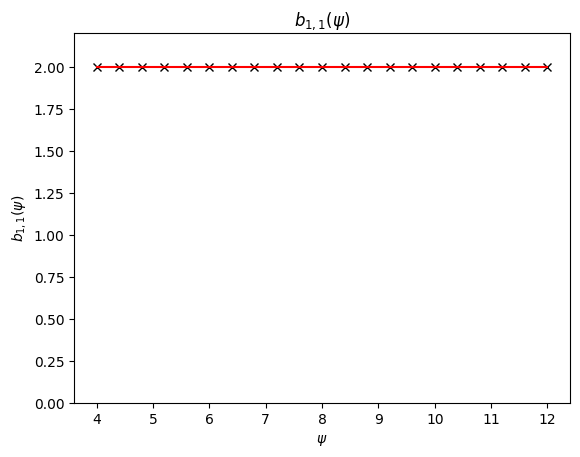

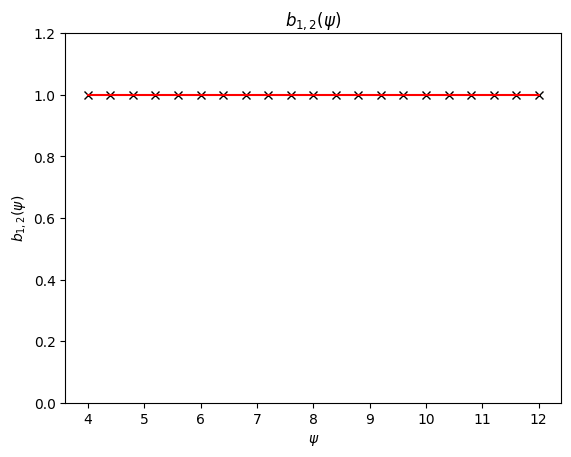

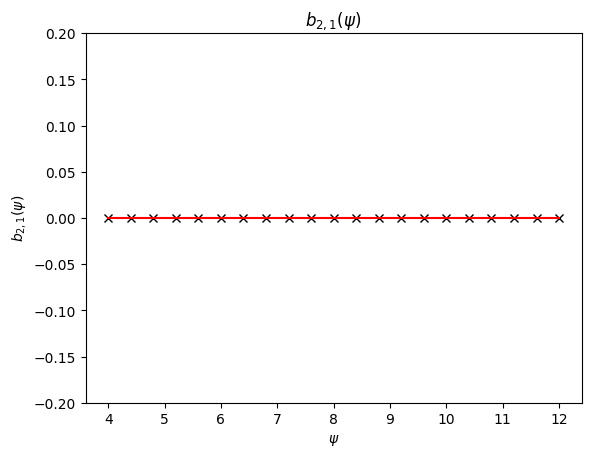

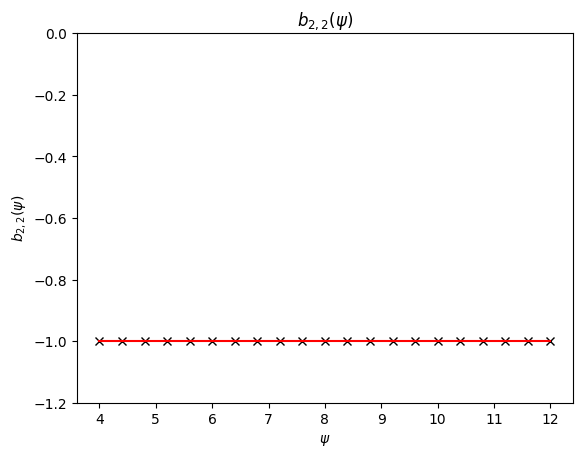

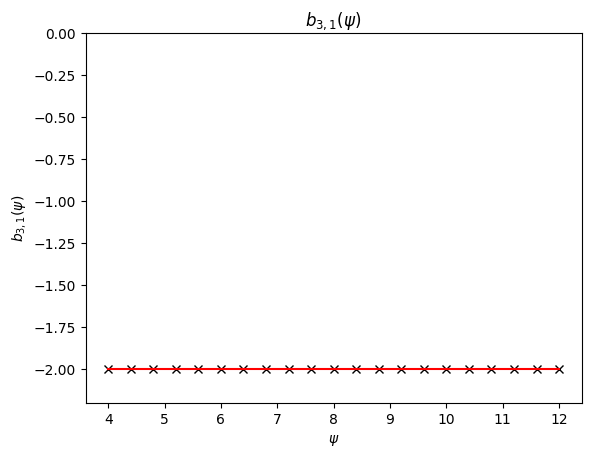

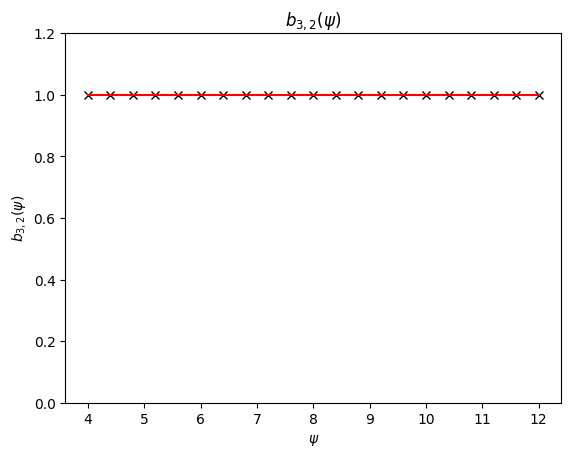

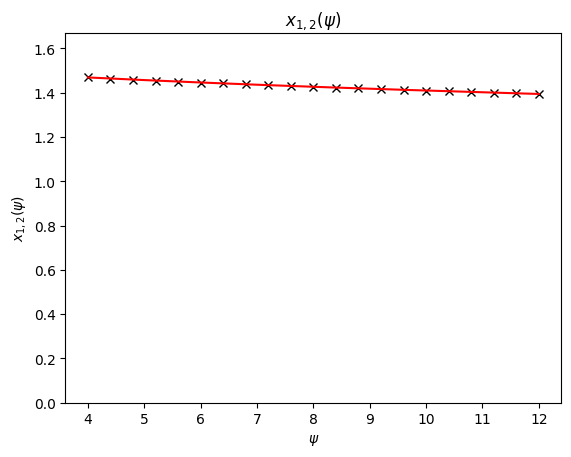

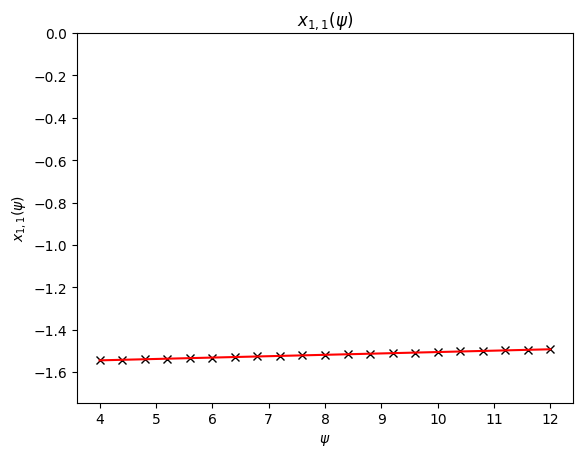

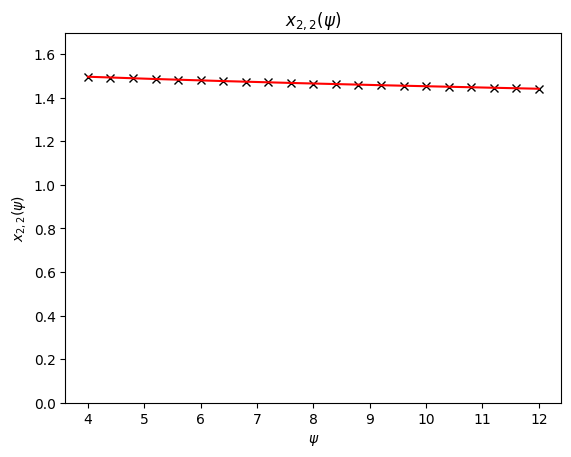

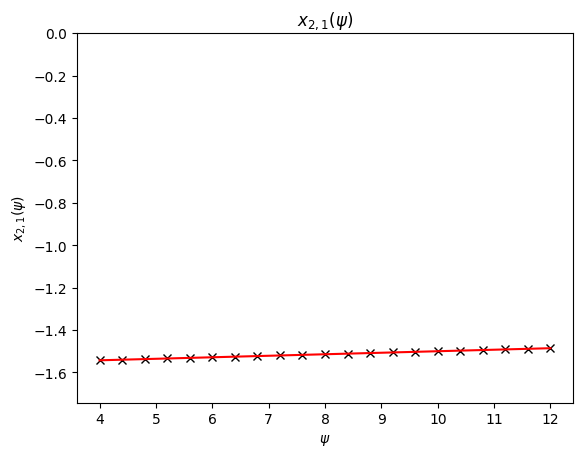

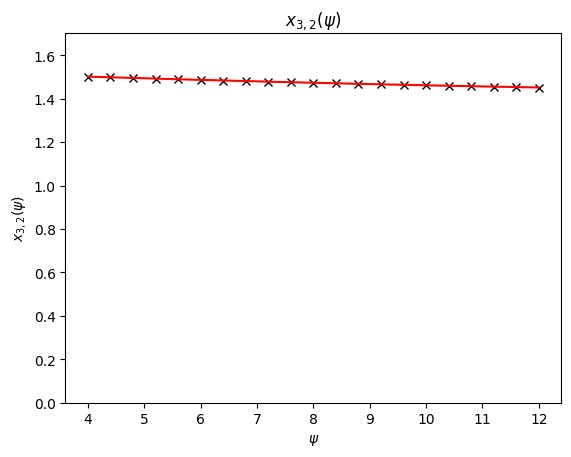

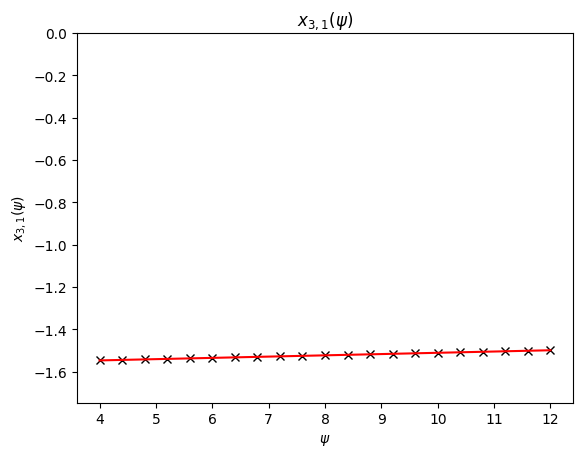

[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3]


In [6]:
# fit polynomials in psi to the filter coefficients
def polynomial_order_zero(x, a0):
    return np.repeat(a0, len(x))
def polynomial_order_one(x, a0, a1):
    return a0 + a1 * x
def polynomial_order_two(x, a0, a1, a2):
    return a0 + a1 * x + a2 * np.power(x, 2)
def polynomial_order_three(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * np.power(x, 2) + a3 * np.power(x, 3)
# jacobians
def polynomial_order_zero_jac(x, a0):
    return np.ones((len(x), 1))
def polynomial_order_one_jac(x, a0, a1):
    j = np.ones((len(x), 2))
    j[:,1] = x
    return j
def polynomial_order_two_jac(x, a0, a1, a2):
    j = np.ones((len(x), 3))
    j[:,1] = x
    j[:,2] = np.power(x, 2)
    return j
def polynomial_order_three_jac(x, a0, a1, a2, a3):
    j = np.ones((len(x), 4))
    j[:,1] = x
    j[:,2] = np.power(x, 2)
    j[:,3] = np.power(x, 3)
    return j
polynomial_order = [3 for kx in range(nx)]
polynomials = [polynomial_order_zero, polynomial_order_one, polynomial_order_two, polynomial_order_three]
jacs = [polynomial_order_zero_jac, polynomial_order_one_jac, polynomial_order_two_jac, polynomial_order_three_jac]
a_opts = []
parameter_names = [r'$g(\psi)$']
for k_section in range(n_section):
    for k_coeff in range(2):
        parameter_names.append(r'$b_{' + str(k_section + 1) + ', ' + str(k_coeff + 1) + r'}(\psi)$')
for k_section in range(n_section):
    for k_coeff in [2,1]:
        parameter_names.append(r'$x_{' + str(k_section + 1) + ', ' + str(k_coeff) + r'}(\psi)$')
for kx in range(nx):
    delta_rms = 0.
    poly_order = 4
    rms = -1.
    while (delta_rms < 0.001) & (poly_order > 0):
        poly_order = poly_order - 1
        if rms > 0:
            last_a_opt = copy.deepcopy(a_opt[0])
        a_opt = opt.curve_fit(polynomials[poly_order], psi_d, x_opts[:,kx], jac=jacs[poly_order])
        x_fit = polynomials[poly_order](psi_d, *(a_opt[0]))
        x_test = copy.deepcopy(x_opts)
        x_test[:,kx] = x_fit
        numerator = 0.
        for k_psi in range(n_psi):
            sos = x_to_sos(x_test[k_psi,:], lam)
            w, h = signal.freqz_sos(sos, omega_d, fs=fs)
            numerator += np.sum(np.power(np.abs(h) - Cd(omega_d, psi_d[k_psi], filter_order, psi_range, fc_range, fc_width, fs), 2.))
        if rms < 0:
            denominator = 0.
            for k_psi in range(n_psi):
                denominator += np.sum(np.power(Cd(omega_d, psi_d[k_psi], filter_order, psi_range, fc_range, fc_width, fs), 2.))
            rms = np.sqrt(numerator / denominator)
            last_a_opt = copy.deepcopy(a_opt[0])
        this_rms = np.sqrt(numerator / denominator)
        delta_rms = np.abs(this_rms - rms) / rms        
    polynomial_order[kx] = poly_order + 1
    a_opts.append(last_a_opt)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(psi_d, x_opts[:,kx], 'kx')
    psi_fit = np.linspace(psi_range[0], psi_range[1], n_psi * 10)
    ax.plot(psi_fit, polynomials[polynomial_order[kx]](psi_fit, *a_opts[kx]), 'r-')
    ax.set_ylim(np.min([np.min([np.min(x_opts[:,kx]) - 0.2, np.min(x_opts[:,kx]) * 1.1]), 0.]), np.max([np.max([np.max(x_opts[:,kx]) + 0.2, np.max(x_opts[:,kx]) * 1.1]), 0.]))
    ax.set_title(parameter_names[kx])
    ax.set_xlabel(r'$\psi$')
    ax.set_ylabel(parameter_names[kx])
    plt.show()
print(polynomial_order)

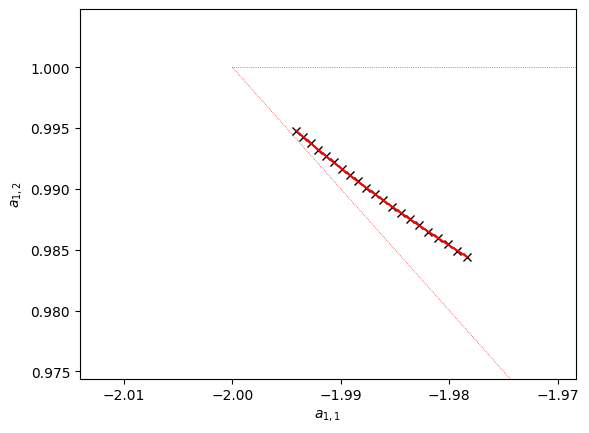

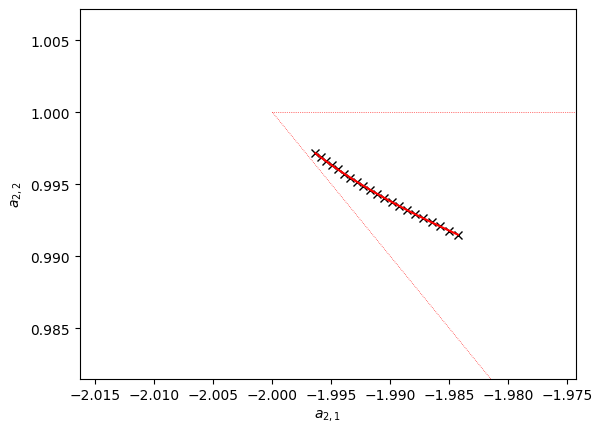

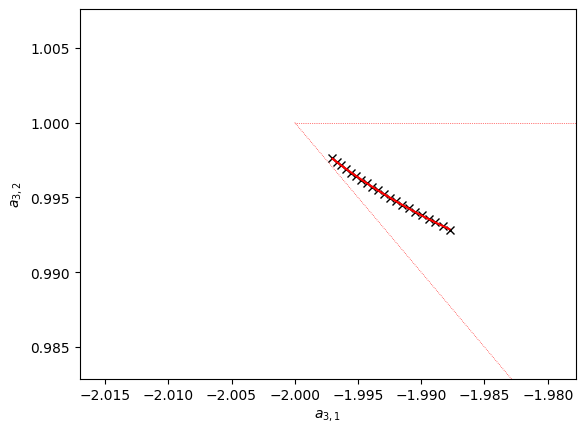

In [7]:
# check stability triangle for fixed-coefficient and fitted variable-coefficient filters
n_psi_fit = 41
psi_fit = np.linspace(psi_range[0], psi_range[1], n_psi_fit)
for k_section in range(n_section):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot([-2.,2.],[1.,1.], 'r:', linewidth=0.5)
    ax.plot([-2.,0.],[1.,-1.], 'r:', linewidth=0.5)
    ax.plot([0.,2.],[-1.,1.], 'r:', linewidth=0.5)
    for k_psi in range(n_psi):
        xi2 = x_opts[k_psi, 1 + n_section * 2 + k_section * 2]
        xi1 = x_opts[k_psi, 1 + n_section * 2 + k_section * 2 + 1]
        ai2 = lam * np.sin(xi2)
        ai1 = lam * np.sin(xi1) * (1. + ai2)
        ax.plot(ai1, ai2, 'kx')
    ai2_fit = np.zeros(n_psi_fit)
    ai1_fit = np.zeros(n_psi_fit)
    for k_psi in range(n_psi_fit):
        xi2 = polynomials[polynomial_order[1 + n_section * 2 + k_section * 2]](psi_fit[k_psi], *a_opts[1 + n_section * 2 + k_section * 2])
        xi1 = polynomials[polynomial_order[1 + n_section * 2 + k_section * 2 + 1]](psi_fit[k_psi], *a_opts[1 + n_section * 2 + k_section * 2 + 1])
        ai2_fit[k_psi] = lam * np.sin(xi2)
        ai1_fit[k_psi] = lam * np.sin(xi1) * (1. + ai2_fit[k_psi])
    ax.plot(ai1_fit, ai2_fit, 'r')
    ax.set_xlabel(r'$a_{' + str(k_section + 1) + ', 1}$')
    ax.set_ylabel(r'$a_{' + str(k_section + 1) + ', 2}$')
    ax.set_xlim(np.min([np.min(ai1_fit)*1.01, np.min(ai1_fit)-0.01]), np.max([np.max(ai1_fit)*1.01, np.max(ai1_fit)+0.01]))
    ax.set_ylim(np.min([np.min(ai2_fit)*1.01, np.min(ai2_fit)-0.01]), np.max([np.max(ai2_fit)*1.01, np.max(ai2_fit)+0.01]))
    plt.show()

In [8]:
# define a function to save data from python into an hdf5 file to be read by variable_bandwidth_recursive_filter dispatch library
def dict_to_hdf5(d, hdf5_file_handle, key='', group=None):
    import h5py
    import numpy as np
    """
    Saves a dictionary to hdf5 file (array storage is in Fortran order)
    Example:
    my_dict = {'a':{'someval':3}, 'b':{'foo':'bar','baz':['the','quick','fox'],'foobar':[1,2,3],'foobaz':[3.14,2.71,0.],'barbaz':np.eye(3)}}
    with h5py.File('test_file.hdf5', 'w') as f:
        dict_to_hdf5(my_dict, f)

    Inputs:
    d: data; at the highest level, this should be a dictionary where data values are stored no higher than the second level, e.g. d[key1][key2]=value,
       dictionaries with data stored at the first level, e.g. d[key1]=value, will throw an exception
    hdf5_file_handle: a file handle returned by h5py.File(...,'w') (must have write permission)
    key: used only in recursive calls (sets group or dataset names)
    group: used only in recursive calls (an hdf5 group object, to which datasets will be added)
    """
    try:
        if group is None:
            if isinstance(d, dict):
                for k in d.keys():
                    if isinstance(d[k], dict):
                        # create root-level group
                        group = hdf5_file_handle.create_group(str(k))
                        dict_to_hdf5(d[k], hdf5_file_handle, '', group)
                    else:
                        raise Exception('dict_to_hdf5(): d must be a >= 2-level dictionary when group is None (data values may not be given at or above the second level of the dictionary: d[key1]=value is not allowed; d[key1][key2]=value is allowed)')
            else:
                raise Exception('dict_to_hdf5(): d must be a dictionary when group is None')
        elif isinstance(d, dict):
            for k in d.keys():
                if isinstance(d[k], dict):
                    # create secondary group
                    subgroup = group.create_group(str(k))
                    dict_to_hdf5(d[k], hdf5_file_handle, '', subgroup)
                else:
                    # create dataset
                    dict_to_hdf5(d[k], hdf5_file_handle, str(k), group)
        elif isinstance(d, str):
            group.create_dataset(key, shape=1, dtype=h5py.string_dtype(length=len(d)), data=d)
        elif isinstance(d, list):
            if all([isinstance(e, str) for e in d]):
                group.create_dataset(key, len(d), dtype=h5py.string_dtype(length=max([len(s) for s in d])), data=d)
            elif all([isinstance(e, (int, float)) for e in d]):
                group.create_dataset(key, data=[float(x) for x in d])
            else:
                raise Exception('dict_to_hdf5(): unsupported list data (not string, int, or float): key=' + key)
        elif isinstance(d, (int, float)):
            group.create_dataset(key, data=float(d))
        elif isinstance(d, np.ndarray):
            ax = tuple([d.ndim-i-1 for i in range(d.ndim)])
            group.create_dataset(key, data=np.transpose(d, axes=ax))
        else:
            raise Exception('dict_to_hdf5(): unsupported data type (not string, list, scalar numeric, or numpy.ndarray): key=' + key)
    except Exception as e:
        hdf5_file_handle.close()
        raise

In [9]:
# save fit coefficients in hdf5 format for input to variable_bandwidth_recursive_filter dispatch library
# sample_period
# input signal
# output signal
# psi signal
# psi range (do not extrapolate filter coefficients beyond psi range)
# number of sections
# g
# b11
# b12
# ...
# x12
# x11
# ...
data_dir = os.getcwd() # modify this as needed
filter_data = {'filter':{'sample_period':0.0625,
                         'input_signal':'measured_generator_speed',
                         'output_signal':'measured_generator_speed_1p',
                         'psi_signal':'operating_point',
                         'psi_range':[4.,25.],
                         'n_section':n_section,
                         'g':a_opts[0],
                         'lambda':lam
                        }
              }
# add the bi[1,2] and xi[1,2] polynomial coefficients to the filter_data dictionary
for i in range(n_section):
    filter_data['filter']['b' + str(i+1) + '1'] = a_opts[1 + i]
    filter_data['filter']['b' + str(i+1) + '2'] = a_opts[1 + i + 1]
    filter_data['filter']['x' + str(i+1) + '2'] = a_opts[1 + n_section * 2 + i * 2]
    filter_data['filter']['x' + str(i+1) + '1'] = a_opts[1 + n_section * 2 + i * 2 + 1]
with h5py.File(os.path.join(data_dir, 'measured_generator_speed_1p_filter_data.hdf5'), 'w') as f:
    dict_to_hdf5(filter_data, f)
    print('filter data saved in: ' + os.path.join(data_dir, 'measured_generator_speed_1p_filter_data.hdf5'))

filter data saved in: C:\Users\jaehl\Documents\Personal\Code\windTurbineControl\dispatch_private\prj\variable_bandwidth_recursive_filter\design\measured_generator_speed_1p_filter_data.hdf5
